In [23]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime

import seawater as sw

In [24]:
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [3]:
file='/Users/pvb/Downloads/cmems_mod_glo_phy_my_0.083deg_P1M-m_so-thetao_90.00W-10.00W_20.50N-28.50N_0.49-1941.89m_1993-01-01-2021-06-01.nc'

In [4]:
data = xr.open_dataset(file)

In [16]:
data.time

<xarray.DataArray 'time' (time: 342)> Size: 3kB
array(['1993-01-01T00:00:00.000000000', '1993-02-01T00:00:00.000000000',
       '1993-03-01T00:00:00.000000000', ..., '2021-04-01T00:00:00.000000000',
       '2021-05-01T00:00:00.000000000', '2021-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 1993-01-01 1993-02-01 ... 2021-06-01
Attributes:
    valid_min:  1993-01-01T00:00:00.000000000
    valid_max:  2021-06-01T00:00:00.000000000

## Reduzco el tamaño de la matriz

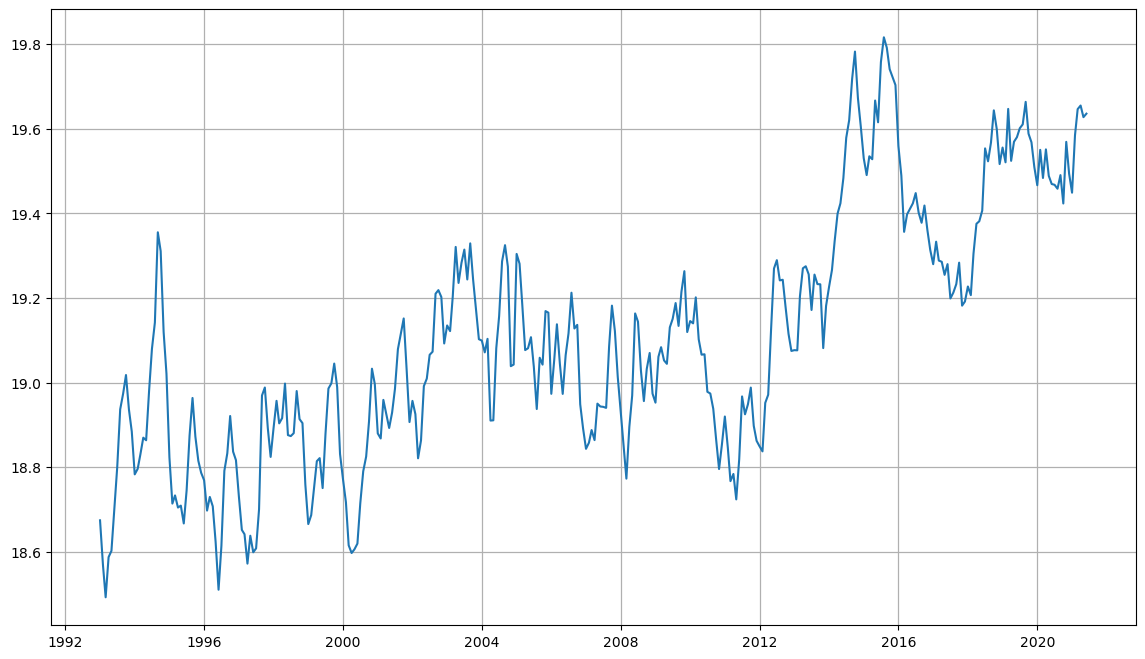

In [13]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(data.time,
        data.thetao.mean(dim='latitude').mean(dim='longitude').sel(depth=200,method="nearest"),
        label = '200')
ax.grid(linestyle='-', linewidth=.9);

In [51]:
data2=data.interp(latitude=[24.5], method="linear").squeeze('latitude').drop_vars('latitude')

In [18]:
loni=-71
lonf=-24
data3=data2.interp(longitude=np.arange(loni,lonf,1))

In [19]:
data3

<xarray.Dataset> Size: 10MB
Dimensions:    (depth: 40, time: 342, longitude: 47)
Coordinates:
  * depth      (depth) float32 160B 0.494 1.541 2.646 ... 1.684e+03 1.942e+03
  * time       (time) datetime64[ns] 3kB 1993-01-01 1993-02-01 ... 2021-06-01
  * longitude  (longitude) int64 376B -71 -70 -69 -68 -67 ... -28 -27 -26 -25
Data variables:
    so         (time, depth, longitude) float64 5MB 36.64 36.65 ... 35.07 35.1
    thetao     (time, depth, longitude) float64 5MB 24.28 24.26 ... 4.048 4.289
Attributes: (12/15)
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    credit:                        E.U. Copernicus Marine Service Information...
    dataset:                       global-reanalysis-001-030-monthly
    institution:                   Mercator Ocean
    ...                            ...
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    references:                    http://marine.copernicus.eu
    source:                        MERCATOR GLORYS12V1
    title:                         Monthly mean fields for product GLOBAL_REA...
    copernicusmarine_version:      1.1.1

In [34]:
ptemperature = data3.thetao.values
salinity = data3.so.values
lon = data3.longitude.values
time = data3.time.values
pre = sw.pres(data3.depth,24.5)

In [49]:
np.shape(pre)

(40,)

In [45]:
preM = np.repeat(pre, ptemperature.shape[0]*ptemperature.shape[2], axis=0).reshape(342,40,47)

In [46]:
np.shape(preM)

(342, 40, 47)

In [48]:
preM[0,:,2]

array([0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529,
       0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529,
       0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529,
       0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529,
       0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529,
       0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529, 0.4989529,
       0.4989529, 0.4989529, 0.4989529, 0.4989529], dtype=float32)

In [ ]:
temperature=sw.temp(salinity,ptemperature,preM)

In [50]:
np.shape(salinity)

(342, 40, 47)